# Mammography Mass ML Model

In this notebook we have done analysis on Mammography Mass Dataset, implement ML pipelines for simple ML model comparison and investigate for investigation of the relationship between various features and the responses.

## 1. Statistical Classification model to detect severity

Import the Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Load the dataset

In [2]:
df_train = pd.read_excel('train.xlsx', index_col=0)
df_test = pd.read_excel('test.xlsx', index_col=0)

# EDA

## 7. Comment on EDA of variables in data.

Let's look at the data

In [3]:
df_train.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
Index,,,,,,
1,5.0,67.0,lobular,spiculated,low,1
2,4.0,43.0,round,circumscribed,NaN,1
3,5.0,58.0,irregular,spiculated,low,1
4,4.0,28.0,round,circumscribed,low,0
5,5.0,74.0,round,spiculated,NaN,1


In [4]:
df_train.shape

(811, 6)

In [5]:
df_test.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
Index,,,,,,
1,5,65.0,lobular,ill-defined,low,1
2,5,74.0,lobular,microlobulated,low,1
3,4,NaN,oval,circumscribed,low,0
4,4,57.0,irregular,ill-defined,fat-containing,1
5,4,76.0,lobular,microlobulated,low,0


In [6]:
df_test.shape

(150, 6)

## 9. What techniques have been used for treating missing values to prepare features for model building?

Let check for null values in the dataset

In [7]:
df_train.isnull().sum()

BI_RADS          2
Age             88
Shape           30
Margin          47
Mass_Density    76
Severity         0
dtype: int64

In [8]:
df_test.isnull().sum()

BI_RADS          0
Age             12
Shape            1
Margin           1
Mass_Density     0
Severity         0
dtype: int64

We can see from the above values that training data holds alot of null values. Where we would have to check for distribution of the null values in the dataset.

In [9]:
df_train[df_train['Shape'].isnull()|df_train['Margin'].isnull()|df_train['Mass_Density'].isnull()]

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
Index,,,,,,
2,4.0,43.0,round,circumscribed,NaN,1
5,5.0,74.0,round,spiculated,NaN,1
6,4.0,65.0,round,NaN,low,0
7,4.0,70.0,NaN,NaN,low,0
8,5.0,42.0,round,NaN,low,0
...,...,...,...,...,...,...
692,4.0,NaN,lobular,NaN,low,0
724,4.0,60.0,lobular,NaN,fat-containing,0
746,6.0,76.0,lobular,NaN,low,0


In [10]:
df_train = df_train.dropna(subset=['Shape','Margin','BI_RADS','Mass_Density'])
df_test = df_test.dropna(subset=['Shape','Margin'])

Looking at the distribution of null values in the dataset we can see that the values are randomly distributed but we also have a really small dataset of 811 rows, So removing the all 123 rows from dataset will no help us during the training of the dataset.

I am dropping the categorical null values and keeping the numerical null values. Also, the 1 null value of BI_RADS present in the training data.

In [11]:
df_train.isnull().sum()

BI_RADS          0
Age             77
Shape            0
Margin           0
Mass_Density     0
Severity         0
dtype: int64

In [12]:
df_train['Age'] = df_train['Age'].fillna(value = df_train['Age'].mean())

In [14]:
df_test.isnull().sum()

BI_RADS          0
Age             11
Shape            0
Margin           0
Mass_Density     0
Severity         0
dtype: int64

In [15]:
df_test['Age'] = df_test['Age'].fillna(value = df_test['Age'].mean())

Looking at the Age data present in the dataset we can visualize the count of patient's age to look for the distribution of data in the dataset

## 8. How are you detecting and treating outliers in the dataset for better convergence?

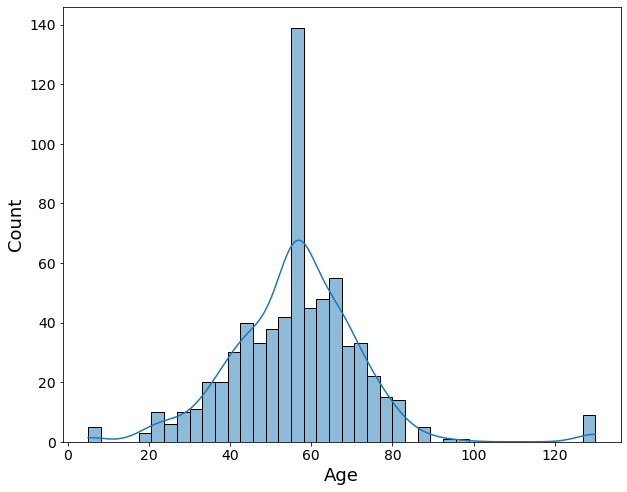

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

# Plot frequency plot/ histogram

sns.histplot(x="Age", kde=True, data=df_train, ax=axes, bins=40);
axes.set(xlabel="Age");
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
axes.tick_params('y', labelsize = 14);
axes.tick_params('x', labelsize = 14);

<AxesSubplot:xlabel='Age'>

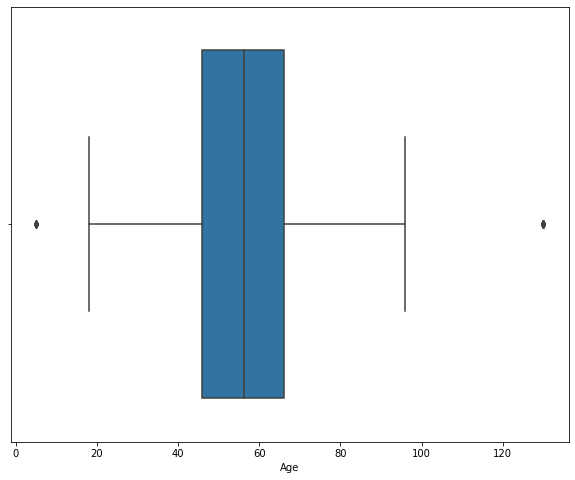

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.boxplot(x='Age', data=df_train)

From the above we can look in the graph that patient's age  above 100 is likely to be a outlier in the dataset. So Dropping the values for age above 100 in the dataset.

In [18]:
df_train = df_train[df_train['Age'] < 100]

In [19]:
df_train['BI_RADS'].value_counts()

4.0     361
5.0     278
3.0      22
6.0       7
2.0       6
0.0       3
55.0      1
Name: BI_RADS, dtype: int64

Assuming the wrong entry for 55 in BI_RADS, I am assuming it to be 5 for this dataset.

In [20]:
df_train['BI_RADS'][df_train[df_train['BI_RADS'] == 55].index] = 5 

In [21]:
df_train['BI_RADS'].value_counts()

4.0    361
5.0    279
3.0     22
6.0      7
2.0      6
0.0      3
Name: BI_RADS, dtype: int64

In [22]:
df_train.describe()

,BI_RADS,Age,Severity
count,678.000000,678.000000,678.000000
mean,4.364307,55.369853,0.486726
std,0.677793,14.143080,0.500193
min,0.000000,5.000000,0.000000
25%,4.000000,46.000000,0.000000
50%,4.000000,56.347541,0.000000
75%,5.000000,65.000000,1.000000
max,6.000000,96.000000,1.000000


In [23]:
categorical_col = ['Shape', 'Margin', 'Mass_Density']
numerical_col = ['BI_RADS','Severity']

Seperating the Categorical and Numerical Columns in Dataset

## 6. Determine whether the data is normally distributed visually and statistically.

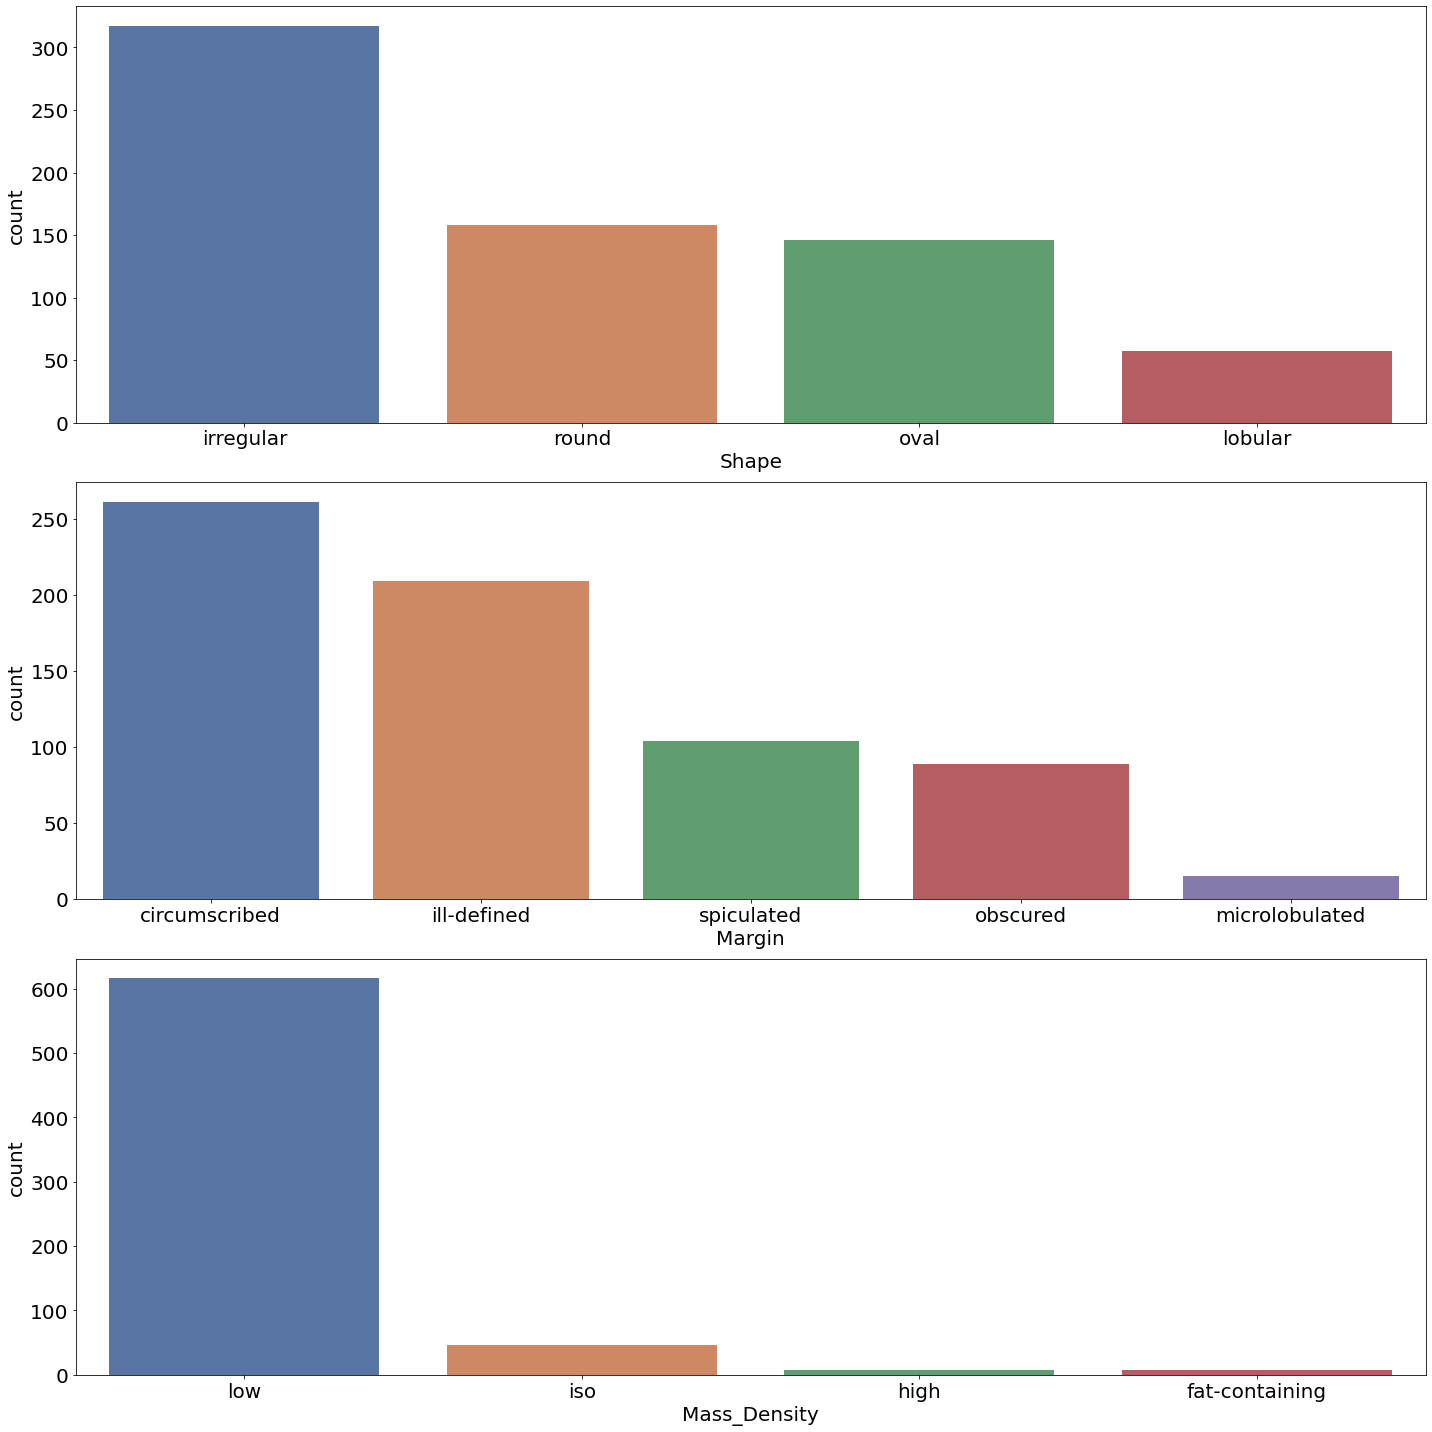

In [24]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20));
for variable, subplot in zip(categorical_col, ax.flatten()):
    subplot.xaxis.label.set_size(20)
    subplot.yaxis.label.set_size(20)
    subplot.tick_params('y', labelsize = 20);
    subplot.tick_params('x', labelsize = 20);
    cp = sns.countplot(x=df_train[variable], ax=subplot, palette='deep', order =
    df_train[variable].value_counts().index);
plt.tight_layout()

From Above, we can see that all the categorical columns graph present above have good variations. Assuming all the values to be same as present.

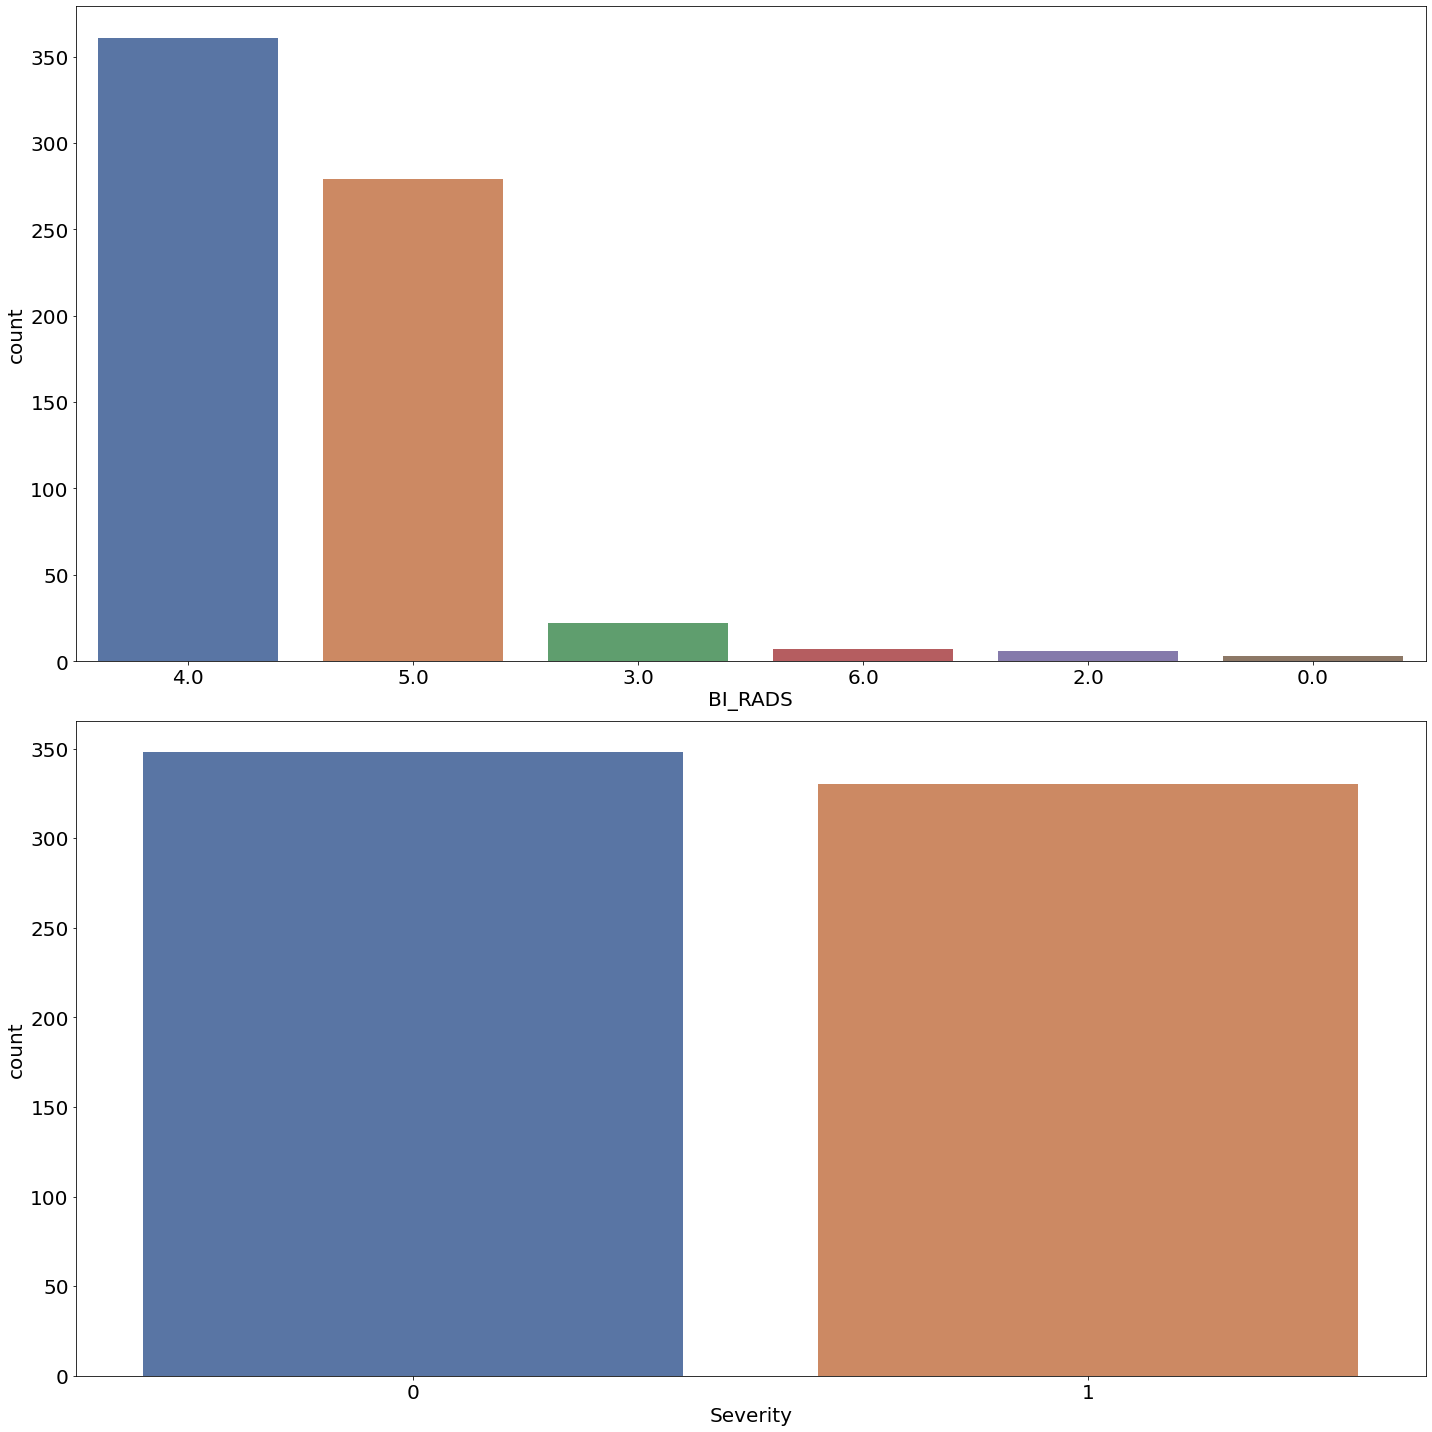

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(20, 20));
for variable, subplot in zip(numerical_col, ax.flatten()):
    subplot.xaxis.label.set_size(20)
    subplot.yaxis.label.set_size(20)
    subplot.tick_params('y', labelsize = 20);
    subplot.tick_params('x', labelsize = 20);
    cp = sns.countplot(x=df_train[variable], ax=subplot, palette='deep', order =
    df_train[variable].value_counts().index);
plt.tight_layout()

From Above, we can see that all the numerical columns graph present above have good variations. Assuming all the values to be same as present.

Also, The severity classes is well distributed and balanced in the dataset. So there is no need for boosting.

## 10. What is the distribution of target with respect to categorical columns?

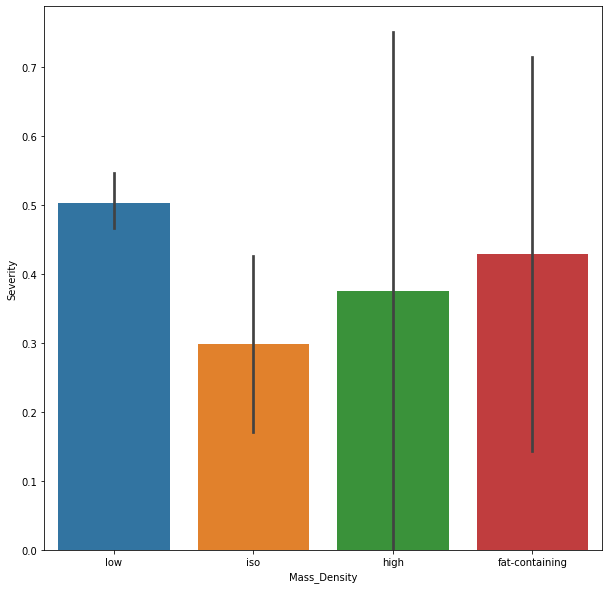

In [26]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=df_train, y = 'Severity', x='Mass_Density')
subplot.xaxis.label.set_size(20)
subplot.yaxis.label.set_size(20)
subplot.tick_params('y', labelsize = 20);
subplot.tick_params('x', labelsize = 20);

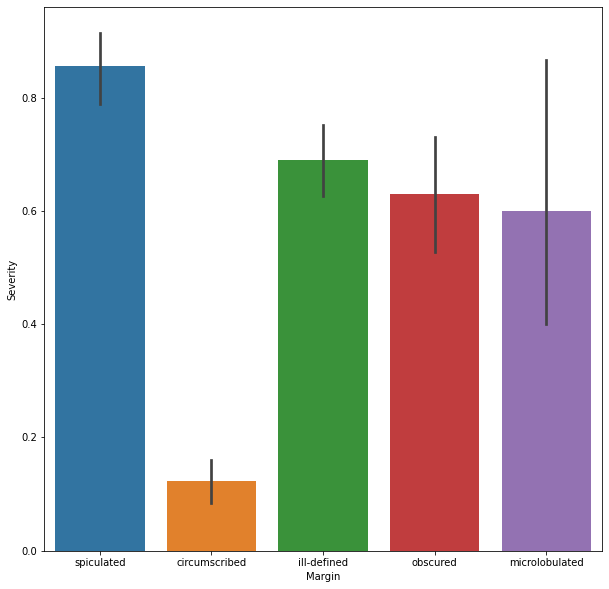

In [27]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=df_train, y = 'Severity', x='Margin')
subplot.xaxis.label.set_size(20)
subplot.yaxis.label.set_size(20)
subplot.tick_params('y', labelsize = 20);
subplot.tick_params('x', labelsize = 20);

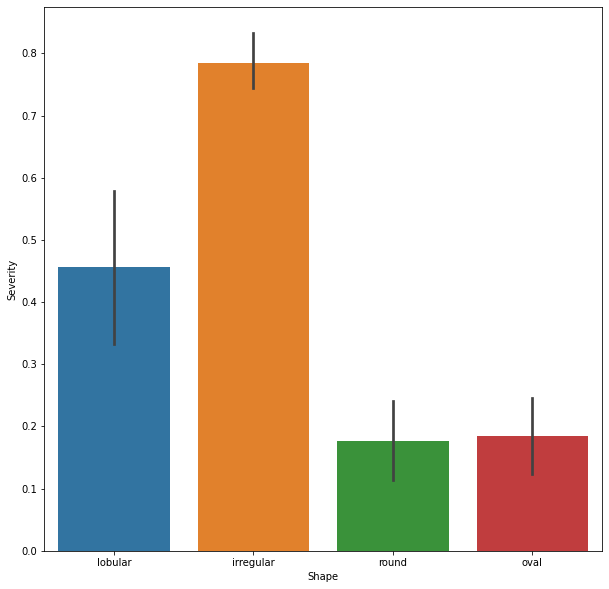

In [28]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=df_train, y = 'Severity', x='Shape')
subplot.xaxis.label.set_size(20)
subplot.yaxis.label.set_size(20)
subplot.tick_params('y', labelsize = 20);
subplot.tick_params('x', labelsize = 20);

All Categorical columns seems to be well balanced with the target columns. Which will not require any changes in the existing data for these columns.

<AxesSubplot:>

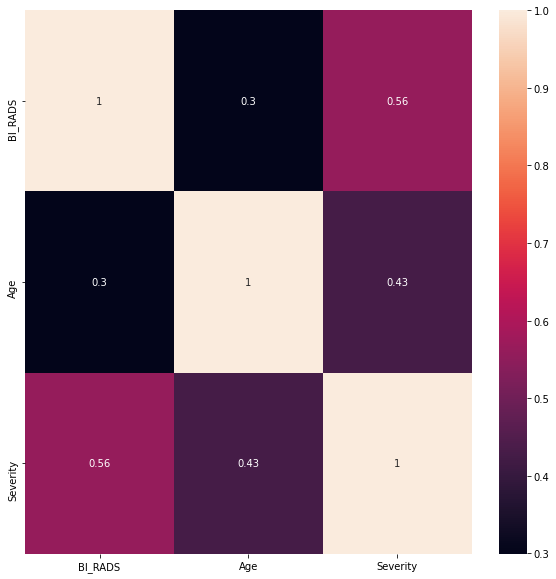

In [29]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True)

# Feature Engineering

## 3. What features would you want to create for your prediction model based on data provided?

In [30]:
df_train = pd.get_dummies(df_train, columns = categorical_col, drop_first=True)

In [31]:
df_test = pd.get_dummies(df_test, columns = categorical_col, drop_first=True)

In [32]:
df_train.head()

,BI_RADS,Age,Severity,Shape_lobular,Shape_oval,Shape_round,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated,Mass_Density_high,Mass_Density_iso,Mass_Density_low
Index,,,,,,,,,,,,,
1,5.0,67.0,1,1,0,0,0,0,0,1,0,0,1
3,5.0,58.0,1,0,0,0,0,0,0,1,0,0,1
4,4.0,28.0,0,0,0,1,0,0,0,0,0,0,1
9,5.0,57.0,1,0,0,1,0,0,0,1,0,0,1
11,5.0,76.0,1,0,0,1,1,0,0,0,0,0,1


In [33]:
df_test.head()

,BI_RADS,Age,Severity,Shape_lobular,Shape_oval,Shape_round,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated,Mass_Density_high,Mass_Density_iso,Mass_Density_low
Index,,,,,,,,,,,,,
1,5,65.000000,1,1,0,0,1,0,0,0,0,0,1
2,5,74.000000,1,1,0,0,0,1,0,0,0,0,1
3,4,55.832117,0,0,1,0,0,0,0,0,0,0,1
4,4,57.000000,1,0,0,0,1,0,0,0,0,0,0
5,4,76.000000,0,1,0,0,0,1,0,0,0,0,1


For Feature Engineering I have turned the categorical values in to get_dummy columns which will help the model to classify classes in a better accuracy.

# Model Building

In [34]:
X_train = df_train.drop(columns=['Severity'],axis=1)
y_train = df_train['Severity']
X_test = df_test.drop(columns=['Severity'],axis=1)
y_test = df_test['Severity']

In [35]:
y_train = np.array(y_train.values.tolist())
y_test = np.array(y_test.values.tolist())

In [36]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X_train)

In [37]:
clf_dtc = DecisionTreeClassifier(random_state= 42)
clf_dtc.fit(scaled_df, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
y_pred = clf_dtc.predict(X_test)
accuracy_score(y_pred, y_test)

0.4797297297297297

In [39]:

clf_svc = SVC(C = 1.0, kernel = 'linear')
clf_svc.fit(scaled_df, y_train)

SVC(kernel='linear')

In [40]:
y_pred = clf_svc.predict(X_test)
accuracy_score(y_pred, y_test)

0.4797297297297297

In [41]:


clf_lr = LogisticRegression()
clf_lr.fit(scaled_df, y_train)

LogisticRegression()

In [42]:
y_pred = clf_lr.predict(X_test)
accuracy_score(y_pred, y_test)

0.4797297297297297

In [43]:
from sklearn import neighbors

clf_knn = neighbors.KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(scaled_df, y_train)

KNeighborsClassifier(n_neighbors=10)

In [44]:
y_pred = clf_knn.predict(X_test)
accuracy_score(y_pred, y_test)

0.4797297297297297

## 4. How have you performed hyper-parameter tuning and model optimization? What are the reasons for your decision choices for these steps?

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier(n_estimators=10, random_state=1)
clf_rfc.fit(scaled_df, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [46]:
y_pred = clf_rfc.predict(X_test)
accuracy_score(y_pred, y_test)

0.8108108108108109

In Random Forest Classifier multiple values for n_estimator was considered for hypertuning out of which n_estimator = 10 has given the best score.

Further, GridSearchCV can be used in the classifier to tune the model's parameter better on the training set.

## 2.What considerations have been used for model selection?

I have considered the model based on their score for accuracy. From above we can see that Random Forest Classifier gives the best score for accuracy.

## 5. What is your model evaluation criteria? What are the assumptions and limitations of your approach?

The Model is evaluated based on the accuracy score for random forest classifier. Assuming the accuracy of the model to be 81% on the testing set. I have tried for calculating the cross validation on training to check if the model don't underfit or overfit.

F1 score is also considered for the evaluating the model where it shows the average weight of recall and precision which shows that model is predicting the results quite accurately.

A Confusion Matrix is also be shown for the same predictions.

In [47]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf_rfc, scaled_df, y_train, cv = 10)
score.mean()

0.8008779631255487

In [48]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
f1_score(clf_rfc.predict(X_test), y_test)

0.8205128205128205

<AxesSubplot:>

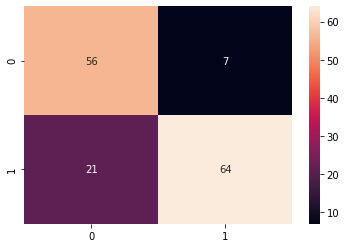

In [49]:
sns.heatmap(confusion_matrix(clf_rfc.predict(X_test), y_test),annot=True)